In [102]:
from sklearn.model_selection import train_test_split
import random
import pickle
import csv
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torch.utils.data import DataLoader,TensorDataset
from torchvision import datasets, transforms

In [103]:
training_file = "./traffic-signs-data/train.p"
testing_file = "./traffic-signs-data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)

In [104]:
signs = []
with open('signnames.csv', 'r') as csvfile:
    signnames = csv.reader(csvfile, delimiter=',')
    next(signnames,None)
    for row in signnames:
        signs.append(row[1])
    csvfile.close()

In [105]:
X, y = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Number of training examples
n_train = X_train.shape[0]

# Number of testing examples
n_test = X_test.shape[0]

# What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

X_train_torch = torch.tensor(X_train, dtype=torch.float32).permute(0, 3, 1, 2)  # (batch, channels, height, width)
y_train_torch = torch.tensor(y_train, dtype=torch.long)
X_test_torch = torch.tensor(X_test, dtype=torch.float32).permute(0, 3, 1, 2)
y_test_torch = torch.tensor(y_test, dtype=torch.long)

train_data = TensorDataset(X_train_torch, y_train_torch)
test_data  = TensorDataset(X_test_torch, y_test_torch)

BATCH_SIZE = 32

train_loader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True, drop_last=True)
test_loader  = DataLoader(test_data, batch_size=BATCH_SIZE, shuffle=False)

print("Number of training examples: ", n_train)
print("Number of testing examples: ", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples:  27839
Number of testing examples:  6960
Image data shape = (32, 32, 3)
Number of classes = 43


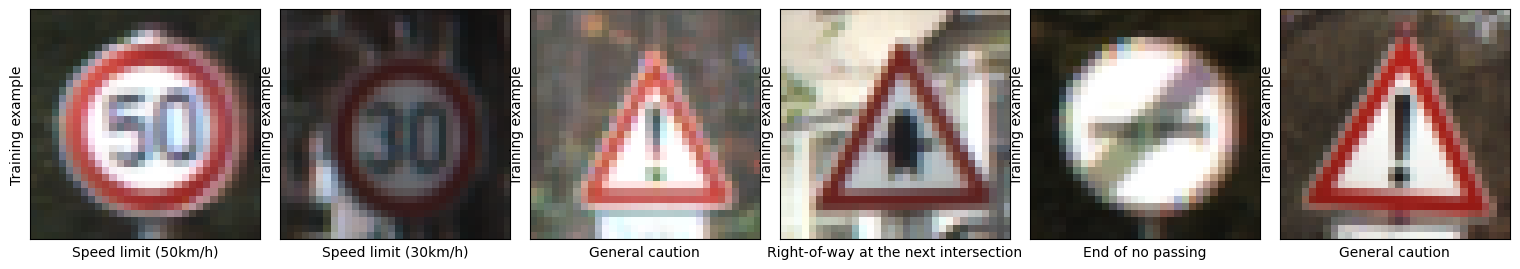

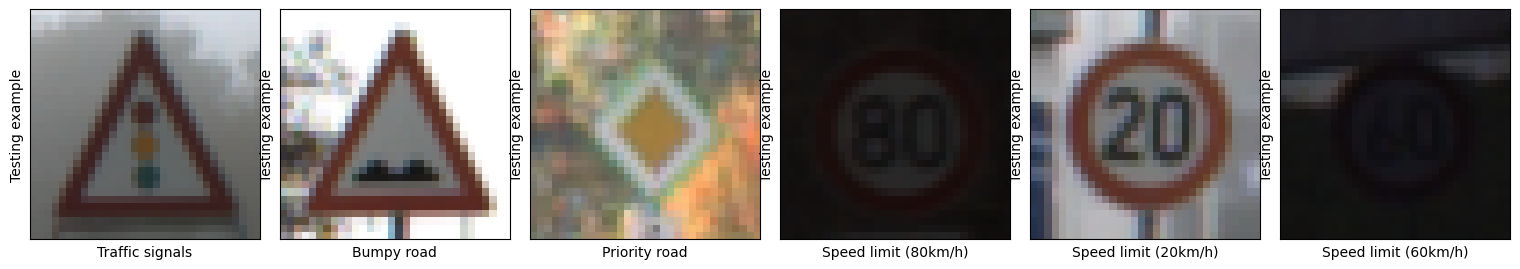

In [106]:
def list_images(dataset, dataset_y, ylabel="", cmap=None):
    """
    Display a list of images in a single figure with matplotlib.
        Parameters:
            images: An np.array compatible with plt.imshow.
            lanel (Default = No label): A string to be used as a label for each image.
            cmap (Default = None): Used to display gray images.
    """
    plt.figure(figsize=(15, 16))
    for i in range(6):
        plt.subplot(1, 6, i+1)
        indx = random.randint(0, len(dataset))
        #Use gray scale color map if there is only one channel
        cmap = 'gray' if len(dataset[indx].shape) == 2 else cmap
        plt.imshow(dataset[indx], cmap = cmap)
        plt.xlabel(signs[dataset_y[indx]])
        plt.ylabel(ylabel)
        plt.xticks([])
        plt.yticks([])
    plt.tight_layout(pad=0, h_pad=0, w_pad=0)
    plt.show()

list_images(X_train, y_train, "Training example")
list_images(X_test, y_test, "Testing example")

# LeNet-5 Model

In [108]:
class LeNet5(nn.Module):
    def __init__(self, num_classes):
        super(LeNet5, self).__init__()
        
        self.conv1 = nn.Conv2d(3, 6, kernel_size=5)  # Conv layer 1 (3 input channels)
        self.pool = nn.AvgPool2d(2, 2)  # Avg Pooling 2x2
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5)  # Conv layer 2

        self.fc1 = nn.Linear(16 * 5 * 5, 120)  # Fully connected layer 1
        self.fc2 = nn.Linear(120, 84)  # Fully connected layer 2
        self.fc3 = nn.Linear(84, num_classes)  # Output layer

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))  # Conv1 + ReLU + Pool
        x = self.pool(torch.relu(self.conv2(x)))  # Conv2 + ReLU + Pool
        x = x.view(-1, 16 * 5 * 5)  # Flatten before FC layers
        x = torch.relu(self.fc1(x))  # FC1 + ReLU
        x = torch.relu(self.fc2(x))  # FC2 + ReLU
        x = self.fc3(x)  # Output layer (logits)
        return x

In [109]:
# Initialize Model
num_classes = len(torch.unique(y_train_torch))
model = LeNet5(num_classes)

# Move to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# ------------------------------
# 📌 Step 4: Define Loss Function & Optimizer
# ------------------------------
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# ------------------------------
# 📌 Step 5: Train the Model
# ------------------------------
EPOCHS = 20
train_losses = []
val_losses = []

In [110]:
def trainLeNet5Model():
    EPOCHS = 20
for epoch in range(EPOCHS):
    model.train()
    running_loss = 0.0

    trainLoss = torch.zeros(numepochs)
    testLoss  = torch.zeros(numepochs)
    trainAcc  = torch.zeros(numepochs)
    testAcc   = torch.zeros(numepochs)
    
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        batchLoss.append(loss.item())
        batchAcc.append( torch.mean(( (yHat>0) ==y).float()).item() )

        running_loss += loss.item()

    train_loss = running_loss / len(train_loader)
    train_losses.append(train_loss)

    print(f"Epoch {epoch+1}/{EPOCHS} - Train Loss: {train_loss:.4f}")

print("Training Completed!")

Epoch 1/20 - Train Loss: 0.9965
Epoch 2/20 - Train Loss: 0.2834
Epoch 3/20 - Train Loss: 0.1715
Epoch 4/20 - Train Loss: 0.1427
Epoch 5/20 - Train Loss: 0.1175
Epoch 6/20 - Train Loss: 0.0967
Epoch 7/20 - Train Loss: 0.0824
Epoch 8/20 - Train Loss: 0.0748
Epoch 9/20 - Train Loss: 0.0742
Epoch 10/20 - Train Loss: 0.0519
Epoch 11/20 - Train Loss: 0.0650
Epoch 12/20 - Train Loss: 0.0599
Epoch 13/20 - Train Loss: 0.0650
Epoch 14/20 - Train Loss: 0.0458
Epoch 15/20 - Train Loss: 0.0590
Epoch 16/20 - Train Loss: 0.0527
Epoch 17/20 - Train Loss: 0.0524
Epoch 18/20 - Train Loss: 0.0386
Epoch 19/20 - Train Loss: 0.0408
Epoch 20/20 - Train Loss: 0.0571
Training Completed!


In [111]:
model.eval()
test_loss = 0.0
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        loss = criterion(outputs, labels)
        test_loss += loss.item()

        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

test_loss /= len(test_loader)
test_acc = 100 * correct / total

print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.2f}%")

Test Loss: 0.0753, Test Accuracy: 98.49%


# VGGNet Model